# Assignment 5- Simulation of Call Option Prices via SDEs with Euler–Maruyama and Monte Carlo
This notebook simulates and estimates the prices of different call options based on Geometric Brownian Motion (GBM).
We use the Euler–Maruyama method for discretization and the Monte Carlo framework for averaging.

# Geometric Brownian Motion (GBM)

GBM models asset prices using the stochastic differential equation:

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

**Parameters**:
- $\mu$: Drift coefficient (expected return)
- $\sigma$: Volatility coefficient
- $dW_t$: Increment of a Wiener process (Brownian motion)

---

## Euler-Maruyama Discretization

For numerical simulations, the discretized form is:

$$
S_{t+\Delta t} = S_t + \mu S_t \Delta t + \sigma S_t \sqrt{\Delta t} \, Z
$$

**Where**:
- $\Delta t$: Time step size
- $Z \sim N(0,1)$: Standardmu - 0.5*sigma**2)*t + sigma*W)
    return t, St t} Z \] t} Z \]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1           # Time to maturity (in years)
r = 0.05        # Risk-free interest rate
sigma = 0.2     # Volatility of the underlying asset
N = 252         # Number of time steps (daily steps for 1 year)
M = 10000       # Number of Monte Carlo simulations
dt = T / N      # Time step size

## <a name='sim'></a>Simulate Asset Paths using Euler–Maruyama

In [5]:
Z = np.random.randn(M, N)                        
S = np.zeros((M, N + 1))                         
S[:, 0] = S0                                     

for t in range(1, N + 1):
    S[:, t] = S[:, t - 1] * (1 + r * dt + sigma * np.sqrt(dt) * Z[:, t - 1])

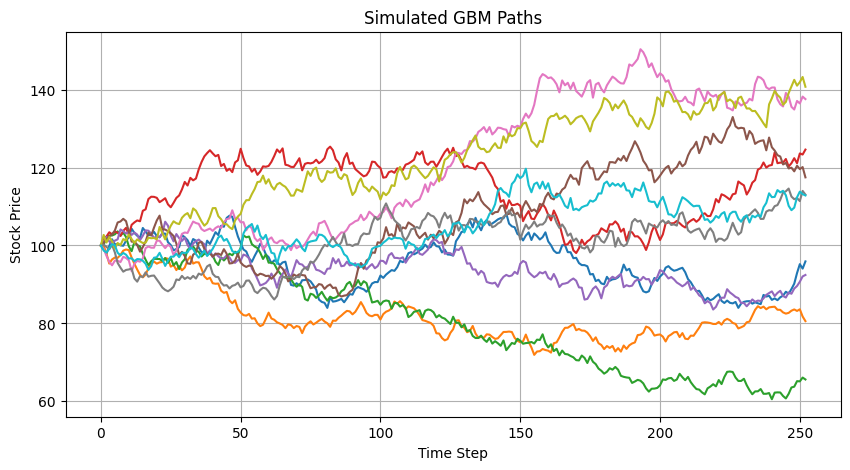

In [6]:
# Plot sample paths
plt.figure(figsize=(10, 5))
plt.plot(S[:10].T)
plt.title("Simulated GBM Paths")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

## <a name='payoffs'></a>Option Payoff Calculations

### 1. European Call Option

**Payoff Function**:
$$
\text{Payoff} = \max(S_T - K, 0)
$$

**Variables**:
- $S_T$: Asset price at expiration
- $K$: Strike prices exerciyoff Diagram")
plt.grid(True)
plt.show() = \text{Payoff} 

In [7]:
european_payoff = np.maximum(S[:, -1] - K, 0)
european_price = np.exp(-r * T) * np.mean(european_payoff)

### 2. Arithmetic Asian Call Option

**Average Price Calculation**:
$$
\bar{S}_{arith} = \frac{1}{N} \sum_{i=1}^N S_i
$$

**Payoff Function**:
$$
\text{Payoff} = \max(\bar{S}_{arith} - K, 0)
$$

**Variables**:
- $\bar{S}_{arith}$: Arithmetic average of asset prices
- $S_i$: Asset price at observation $i$
- $N$: Number of observations
- $K$: Strike price

In [14]:
a_avg = np.mean(S[:, 1:], axis=1)
asian_a_payoff = np.maximum(a_avg - K, 0)
asian_a_price = np.exp(-r * T) * np.mean(asian_a_payoff)

### 3. Geometric Asian Call Option

**Average Price Calculation**:
$$
\bar{S}_{geo} = \left(\prod_{i=1}^{N} S_i\right)^{1/N}
$$

**Payoff Function**:
$$
\text{Payoff} = \max(\bar{S}_{geo} - K, 0)
$$

**Variables**:
- $\bar{S}_{geo}$: Geometric average of asset prices
- $S_i$: Asset price at observation $i$
- $N$: Number of observations
- $K$: Strike price

In [15]:
g_avg = np.exp(np.mean(np.log(S[:, 1:]), axis=1))
asian_g_payoff = np.maximum(g_avg - K, 0)
asian_g_price = np.exp(-r * T) * np.mean(asian_g_payoff)

### 4. Lookback Call Option (Floating Strike)

**Payoff Function**:
$$
\text{Payoff} = \max(S_T - \min(S), 0)
$$

**Variables**:
- $S_T$: Asset price at expiration
- $\min(S)$: Minimum asset price observed during option's life

In [16]:
lookback_floating_payoff = np.maximum(S[:, -1] - np.min(S[:, 1:], axis=1), 0)
lookback_price = np.exp(-r * T) * np.mean(lookback_floating_payoff)

##  <a name='results'></a>Final Option Prices

In [17]:
print(f"European Call Option Price       : {european_price:.4f}")
print(f"Arithmetic Asian Call Option     : {asian_arith_price:.4f}")
print(f"Geometric Asian Call Option      : {asian_geom_price:.4f}")
print(f"Lookback Floating Call Option    : {lookback_price:.4f}")

European Call Option Price       : 10.3795
Arithmetic Asian Call Option     : 5.7568
Geometric Asian Call Option      : 5.5425
Lookback Floating Call Option    : 16.5287
